# Tannis McCartney
## June 22, 2022
## Supervised Machine Learning: Regression Analysis

#### Table of Contents
01 Import libraries and functions

02 Import dataset

03 Wrangle data for regression analysis

04 Explore data

05 Linear regression

06 Discussion

07 Test removing outliers

08 Further discussion

# 01 Import libraries and functions

In [1]:
# Import libraries for analysis
import pandas as pd
import numpy as np

In [2]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Import scikit-learn library and functions
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02 Import data

In [4]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\6 Advanced Analytics and Dashboard Design\Nova Scotia Housing and Income'  

In [5]:
# Load 2018 Canadian Income Survey
CIS2018 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CIS2018_subset.pkl'))
CIS2018.head()

,household_id,person_id,sample_weight,province,age_group,gender,marital_status,after_tax_income,household_size,household_composition,...,disposable_income_below_mbm_flag,ownership_of_dwelling,monthly_mortgage_payment,monthly_condo_fee,monthly_rent,rent_subsidy_flag,core_housing_need_indicator,adult_food_security_status,child_food_security_status,household_food_security_status
0,2129,212901,208.9708,Ontario,25 to 29 years,Female,Common-law,44265.0,2,Two or more person household/One economic family,...,No,Owned by a member of the household,2000.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure
1,2129,212902,208.9708,Ontario,25 to 29 years,Male,Common-law,42985.0,2,Two or more person household/One economic family,...,No,Owned by a member of the household,2000.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure
2,2130,213001,1101.2217,British Columbia,45 to 49 years,Female,Common-law,82370.0,2,Two or more person household/One economic family,...,No,Not owned by a member of the household,NaN,NaN,2900.0,No,Not in core housing need,Food secure,Valid skip,Food secure
3,2130,213002,1101.2217,British Columbia,55 to 59 years,Female,Common-law,49105.0,2,Two or more person household/One economic family,...,No,Not owned by a member of the household,NaN,NaN,2900.0,No,Not in core housing need,Food secure,Valid skip,Food secure
4,2131,213101,165.3016,Saskatchewan,55 to 59 years,Female,Married,21000.0,2,Two or more person household/One economic family,...,No,Owned by a member of the household,1600.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure


# 03 Wrangle data for regression analysis

In [21]:
# Create a subset to examine households only
households2018 = CIS2018.loc[CIS2018['household_maj_income_flag']=='Yes']
households2018.shape

(40857, 24)

In [22]:
# Calculate total housing costs (rent vs mortgage (+ condo fees))
households2018['total_housing_costs'] = households2018[['monthly_mortgage_payment', 'monthly_condo_fee', 'monthly_rent']].sum(axis=1)

C:\Users\tmmcc\AppData\Local\Temp\ipykernel_1176\1742693323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  households2018['total_housing_costs'] = households2018[['monthly_mortgage_payment', 'monthly_condo_fee', 'monthly_rent']].sum(axis=1)


In [23]:
# Look at columns for households2018
households2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40857 entries, 0 to 94334
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   household_id                      40857 non-null  int64  
 1   person_id                         40857 non-null  int64  
 2   sample_weight                     40857 non-null  float64
 3   province                          40857 non-null  object 
 4   age_group                         40857 non-null  object 
 5   gender                            40857 non-null  object 
 6   marital_status                    40857 non-null  object 
 7   after_tax_income                  40857 non-null  float64
 8   household_size                    40857 non-null  int64  
 9   household_composition             40857 non-null  object 
 10  household_maj_income_flag         40857 non-null  object 
 11  after_tax_low_income_flag         40857 non-null  object 
 12  befo

In [26]:
# Create a dataframe for regression analysis
df = households2018[['after_tax_income', 'total_housing_costs', 'ownership_of_dwelling']]
df.head()

,after_tax_income,total_housing_costs,ownership_of_dwelling
0,44265.0,2000.0,Owned by a member of the household
2,82370.0,2900.0,Not owned by a member of the household
5,112195.0,1600.0,Owned by a member of the household
6,70725.0,1700.0,Owned by a member of the household
11,32160.0,400.0,Owned by a member of the household


In [28]:
# Change ownership_of_dwelling to string
df['ownership_of_dwelling'] = df['ownership_of_dwelling'].astype('string')

C:\Users\tmmcc\AppData\Local\Temp\ipykernel_1176\1172512909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ownership_of_dwelling'] = df['ownership_of_dwelling'].astype('string')


<AxesSubplot:xlabel='total_housing_costs', ylabel='Count'>

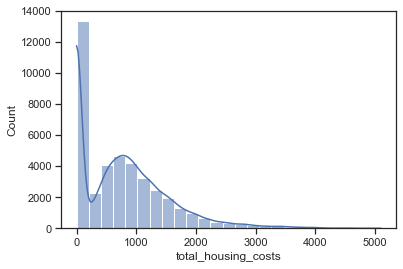

In [32]:
# Check for extreme values
sns.histplot(df['total_housing_costs'], bins=25, kde=True)

In [33]:
# Check descriptive statistics
df.describe()

,after_tax_income,total_housing_costs
count,40857.000000,40857.000000
mean,54336.474778,762.160707
std,38327.105756,743.958607
min,-98175.000000,0.000000
25%,30815.000000,0.000000
50%,46620.000000,700.000000
75%,68015.000000,1200.000000
max,922020.000000,5100.000000


In [35]:
# Check the median
df['total_housing_costs'].median()

700.0

# 04 Explore data

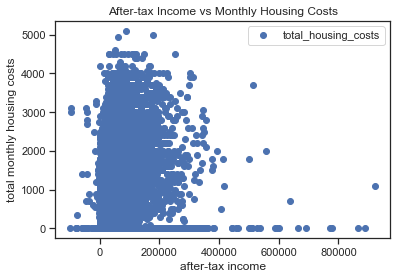

In [34]:
# Create a scatter plot
df.plot(x="after_tax_income", y="total_housing_costs", style = 'o')
plt.title('After-tax Income vs Monthly Housing Costs')
plt.xlabel('after-tax income')
plt.ylabel('total monthly housing costs')
plt.show()

**Hypothesis**: The higher someone's after-tax income, the higher their total housing costs.

In [36]:
# Reshape the variables into separate NumPy arrays
X = df['after_tax_income'].values.reshape(-1,1)
y = df['total_housing_costs'].values.reshape(-1,1)

In [37]:
X

array([[ 44265.],
       [ 82370.],
       [112195.],
       ...,
       [ 58070.],
       [ 23425.],
       [ 53835.]])

In [38]:
y

array([[2000.],
       [2900.],
       [1600.],
       ...,
       [ 700.],
       [ 500.],
       [ 900.]])

In [41]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05 Linear Regression

In [39]:
# Create a regression object
regression = LinearRegression()

In [42]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

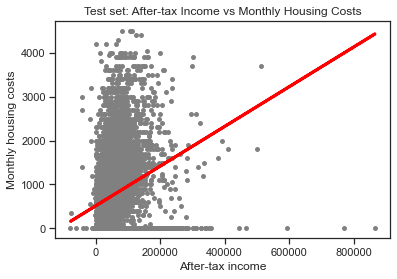

In [44]:
# Create a plot showing the model regression line and the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Test set: After-tax Income vs Monthly Housing Costs')
plot_test.xlabel('After-tax income')
plot_test.ylabel('Monthly housing costs')
plot_test.show()

This line is not a good fit to the data. It seems to fit the possible outliers better than it fits the main cluster of data.

In [45]:
# Create objects for the root mean squared error and R-squared
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [46]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00451669]]
Mean squared error:  533265.978049733
R2 score:  0.05416793285890498


In [47]:
y_predicted

array([[590.11242828],
       [795.64425812],
       [806.19072165],
       ...,
       [713.98256197],
       [828.25473635],
       [713.23730866]])

In [48]:
# Compare actual and predicted y values in a dataframe
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,300.0,590.112428
1,1100.0,795.644258
2,1200.0,806.190722
3,0.0,654.249380
4,1700.0,826.289978
5,0.0,699.009745
6,500.0,673.603383
7,1200.0,853.796600
8,0.0,888.394420
9,2300.0,911.271439


# 06 Discussion

The model did not perform well on the test set. The rmse is very high and the R2 is very low.

This could be because of extreme values (negative after-tax-income or 0 monthly housing costs).

Do the people with zero housing costs live in fully subsidized housing, or own their homes outright? Probably a mix of both. Plotting the data with categorical variables might help.

C:\Users\tmmcc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


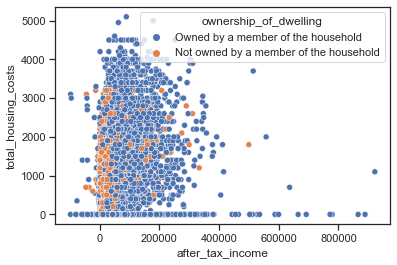

In [51]:
# Create a new scatterplot of the data
sns.scatterplot('after_tax_income', 'total_housing_costs', data=df, hue='ownership_of_dwelling')
plt.show()

It looks like everyone with zero housing costs owns their home. Most of the people with negative after-tax-income also appear to own their home. My untestable hunch is that they got a lot of tax credits etc that year, and were owed taxes (this variable comes from tax returns).

# 07 Test removing outliers

In [53]:
# Remove the negative incomes
df_test = df[df['after_tax_income'] > 0]

In [54]:
# Remove the zero housing costs
df_test = df_test[df_test['total_housing_costs'] > 0]

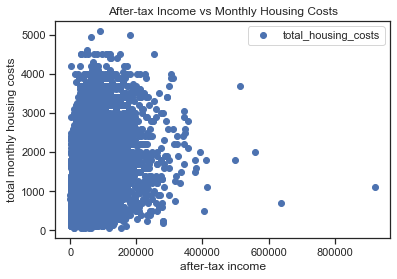

In [55]:
# Check scatterplot without extreme values
df_test.plot(x="after_tax_income", y="total_housing_costs", style = 'o')
plt.title('After-tax Income vs Monthly Housing Costs')
plt.xlabel('after-tax income')
plt.ylabel('total monthly housing costs')
plt.show()

In [56]:
# Reshape the variables into separate NumPy arrays
X_2 = df_test['after_tax_income'].values.reshape(-1,1)
y_2 = df_test['total_housing_costs'].values.reshape(-1,1)

In [57]:
# Split the data into a training set and a test set
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [58]:
# Regression
regression = LinearRegression()
regression.fit(X_2_train, y_2_train)

LinearRegression()

In [59]:
# Predict the values of y using X
y_2_predicted = regression.predict(X_2_test)

In [60]:
# Create objects for the root mean squared error and R-squared
rmse = mean_squared_error(y_2_test, y_2_predicted)
r2 = r2_score(y_2_test, y_2_predicted)

In [61]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00768544]]
Mean squared error:  353999.4454378785
R2 score:  0.16516965749613166


These numbers are better, but still not great.

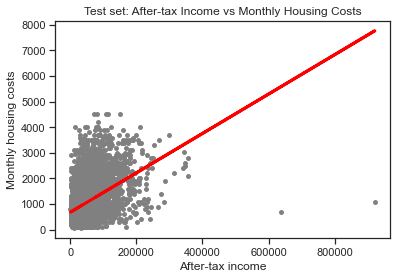

In [62]:
# Create a plot showing the model regression line and the test set
plot_test = plt
plot_test.scatter(X_2_test, y_2_test, color='gray', s = 15)
plot_test.plot(X_2_test, y_2_predicted, color='red', linewidth =3)
plot_test.title('Test set: After-tax Income vs Monthly Housing Costs')
plot_test.xlabel('After-tax income')
plot_test.ylabel('Monthly housing costs')
plot_test.show()

In [63]:
# Compare actual and predicted y values in a dataframe
data = pd.DataFrame({'Actual': y_2_test.flatten(), 'Predicted': y_2_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1200.0,964.881927
1,1600.0,856.863019
2,1500.0,1094.996484
3,1100.0,1299.429279
4,2100.0,911.122250
5,1900.0,2291.312606
6,1200.0,801.297264
7,600.0,942.286723
8,400.0,809.597542
9,1600.0,1557.045342


# 08 Further discussion

This model is not a great fit for this data, even after outliers are removed. Therefore, I conclude that the hypothesis, the higher someone's after-tax income, the higher their total housing costs, is not valid. 

There may be a relationship between after-tax income and total housing costs, but it is more complicated than a simple linear relationship. Household size could be a factor - the larger the household, the larger the house needed. There may be nuances to renting vs home ownership that are not captured by lumping the data together. Location probably matters too - housing costs are much higher in certain provinces and urban centres. Some mortgage payments may have municipal taxes incorporated, some may not. 

Even if the hypothesis had been proven true, these housing costs do not include utilities, which could drastically change someones montly housing costs. Not accounting for this would introduce bias into the analysis.